# Named entity recognition
The exercise shows how we may extract elements such as names of companies, countries and similar objects from text.

### Tasks
Objectives (8 points):


1. Read the API of NER in Spacy
2. Take 1 thousand random passages from the FIQA-PL corpus.

In [2]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [9]:
from datasets import load_dataset
import random

dataset = load_dataset("clarin-knext/fiqa-pl", "corpus")
corpus = dataset['corpus']

random_passages = random.sample(corpus['text'], 1000)

In [23]:
random_passages[:3]

['„Praca w usługach finansowych? Sprzedaż? Powodem jest to, że wiele miejsc pracy niezwiązanych ze sprzedażą wymaga dyplomu MBA i chociaż jest wiele wakatów, istnieje również TONA konkurencji. Wiele osób zdobywa tytuł MBA zaraz po studiach i rozpoczyna pracę na kilka bardzo dobrych miejsc pracy. Nie wierz mi? Przejrzyj kilka ofert pracy na bardzo młodsze stanowiska. Prawie KAŻDA rola menedżera, którą chcą uzyskać MBA - nawet te, które wymagają tylko ponad 2 lat doświadczenia, mówią „"MBA preferowane „”, a zobaczysz, że na każde stanowisko są dziesiątki kandydatów. Zadzwoń do rekrutera, potwierdź to, co mówię”.',
 '"Czy w ogóle czytałeś artykuł? To były osoby, które weszły do \u200b\u200bsklepu i zrobiły to osobiście. Nie ma ""zamówień"" do anulowania. Jeśli chodzi o unieważnienie kart, ponownie artykuł stwierdzał, że wiele osób wzięło Target kart podarunkowych i wykorzystał je do zakupu kart podarunkowych Amex i Visa. tl;dr **RTFA**"',
 'Tak, na pewno. I będzie jeszcze przez jakieś 3,5

3. Use the lemmatized and sentence split documents (using SpaCy API for lemmatization and sentence splitting) to identify the expressions that consist of consecutive words starting with a capital letter (you will have to look at the inflected form of the word to check its capitalization) that do not occupy the first position in a sentence.

In [16]:
!python -m spacy download pl_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 41.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [17]:
import spacy

nlp = spacy.load("pl_core_news_sm")

In [28]:
texts = random_passages

def extract_capitalized_phrases(text):
    doc = nlp(text)
    capitalized_phrases = []

    for sentence in doc.sents:
        phrase = []
        for token in sentence:
            if token.text[0].isupper() and token.i != sentence[0].i:
                if token.pos_ == 'PROPN':
                    phrase.append(token.lemma_)
                else:
                    if phrase:
                        capitalized_phrases.append(" ".join(phrase))
                        phrase = []
            else:
                if phrase:
                    capitalized_phrases.append(" ".join(phrase))
                    phrase = []

        if phrase:
            capitalized_phrases.append(" ".join(phrase)) 

    return capitalized_phrases

all_phrases = []
for text in texts:  
    phrases = extract_capitalized_phrases(text)
    all_phrases.extend(phrases)


for phrase in all_phrases[:10]: 
    print(phrase)

MBA
MBA
Amex
Visa
RTFA
Derrick Rose
Rose
Ameryka
Missouri
Stany


4. Compute the frequency of each identified expression and print 50 results with the largest number of occurrences.

In [29]:
from collections import Counter

phrase_counts = Counter(all_phrases)

top_50_phrases = phrase_counts.most_common(50)
for phrase, count in top_50_phrases:
    print(f"{phrase}: {count}")

USA: 87
IRA: 55
Stany: 45
ETF: 38
HSA: 29
IRS: 26
Indie: 20
Europa: 18
CD: 18
Vanguard: 18
Brytania: 17
LLC: 16
Amazon: 16
ISA: 15
Google: 14
Roth IRA: 14
HFT: 13
Roth: 12
Microsoft: 12
Londyn: 12
Ameryka: 10
Internet: 10
PM: 10
Trump: 10
Facebook: 10
GBP: 10
Apple: 9
HR: 9
Amerykanin: 8
FDIC: 8
TFSA: 8
Kanada: 8
MBA: 7
DTI: 7
CPA: 7
Fed: 7
Yahoo: 7
CV: 7
Target: 7
Tesla: 7
Lợi: 7
Miami: 7
GM: 6
Izrael: 6
INTC: 6
Cisco: 6
Kalifornia: 6
WSJ: 6
VFINX: 6
SIM: 6


5. Apply the NER from SpaCy to identify the named entities in the same set of documents.

In [37]:
import spacy
from datasets import load_dataset

def extract_named_entities(text):
    doc = nlp(text)
    named_entities = []

    for ent in doc.ents:
        named_entities.append(ent.label_)

    return named_entities

all_entity_labels = []
for text in texts:
    entity_labels = extract_named_entities(text)
    all_entity_labels.extend(entity_labels)

for entity in all_entity_labels[:10]:
    print(f"{entity}")

orgName
orgName
orgName
persName
persName
persName
persName
geogName
persName
placeName


6. Plot the frequency (histogram) of the identified classes.

<class 'list'> <class 'list'>


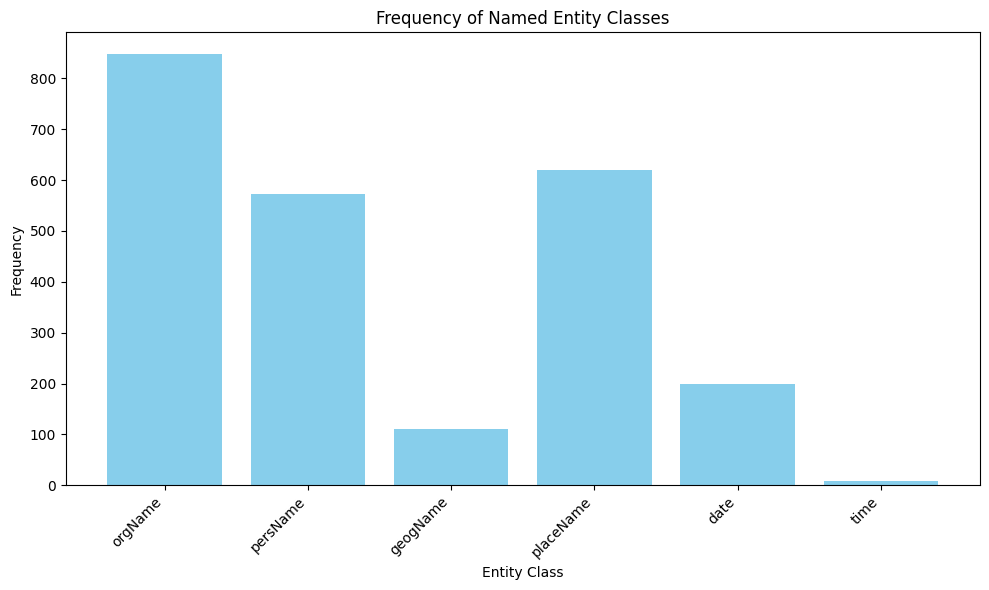

In [38]:
import matplotlib.pyplot as plt

entity_label_counts = Counter(all_entity_labels)

labels = list(entity_label_counts.keys())
counts = list(entity_label_counts.values())

print(type(labels), type(counts))

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.title('Frequency of Named Entity Classes')
plt.xlabel('Entity Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

7. Display 10 most frequent Named Entities for each identified type.

In [40]:
from collections import defaultdict

def extract_named_entities(text):
    doc = nlp(text)
    named_entities = []

    for ent in doc.ents:
        # Zbieramy jednostki i ich etykiety
        named_entities.append((ent.text, ent.label_))

    return named_entities

entity_by_type = defaultdict(Counter)

for text in texts:
    entities = extract_named_entities(text)
    for entity_text, entity_label in entities:
        entity_by_type[entity_label][entity_text] += 1

for entity_label, counter in entity_by_type.items():
    print(f"Top 10 for {entity_label}:")
    top_10_entities = counter.most_common(10)
    for entity, count in top_10_entities:
        print(f"  {entity}: {count}")
    print()

Top 10 for orgName:
  IRA: 54
  ETF: 33
  HSA: 24
  Roth IRA: 15
  S&P: 12
  Microsoft: 12
  Google: 11
  LLC: 11
  Apple: 10
  Target: 9

Top 10 for persName:
  Amazon: 18
  Vanguard: 17
  gdybyś: 9
  Aktywa: 5
  Gdybyś: 5
  Trump: 5
  jakbyś: 5
  Walmart: 4
  Detroit: 4
  Wyklucz: 4

Top 10 for geogName:
  Europie: 12
  europejskich: 4
  Twitterze: 4
  Aldi: 4
  Europa: 3
  Aldi Nord: 3
  Aldi Süd: 3
  TPS: 2
  azjatyckich: 2
  Europy: 2

Top 10 for placeName:
  USA: 88
  Stany Zjednoczone: 18
  amerykańskich: 15
  Wielkiej Brytanii: 14
  Stanach Zjednoczonych: 13
  Indiach: 12
  Stanów Zjednoczonych: 10
  amerykańskie: 10
  amerykańskiej: 8
  Londynie: 8

Top 10 for date:
  2016 r.: 9
  2008 roku: 8
  1099: 5
  2007 r.: 5
  2015 r.: 5
  XX wieku: 4
  2014: 3
  1040: 3
  1995 roku: 3
  2013: 3

Top 10 for time:
  11: 5
  17.: 1
  03.: 1
  14.: 1
  12/13: 1



8. Display 50 most frequent Named Entities including their count and type.

In [41]:
all_entities = []

for text in texts:
    entities = extract_named_entities(text)
    all_entities.extend(entities)

entity_counter = Counter(all_entities)

print(f"Top 50 most frequent named entities:")
for (entity, label), count in entity_counter.most_common(50):
    print(f"{entity} ({label}): {count}")

Top 50 most frequent named entities:
USA (placeName): 88
IRA (orgName): 54
ETF (orgName): 33
HSA (orgName): 24
Stany Zjednoczone (placeName): 18
Amazon (persName): 18
Vanguard (persName): 17
Roth IRA (orgName): 15
amerykańskich (placeName): 15
Wielkiej Brytanii (placeName): 14
Stanach Zjednoczonych (placeName): 13
Europie (geogName): 12
S&P (orgName): 12
Microsoft (orgName): 12
Indiach (placeName): 12
Google (orgName): 11
LLC (orgName): 11
Apple (orgName): 10
Stanów Zjednoczonych (placeName): 10
amerykańskie (placeName): 10
Target (orgName): 9
gdybyś (persName): 9
2016 r. (date): 9
IRS (orgName): 9
MBA (orgName): 8
2008 roku (date): 8
amerykańskiej (placeName): 8
Londynie (placeName): 8
SIM (orgName): 8
Roth (orgName): 7
Amerykanie (placeName): 7
Kalifornia (placeName): 7
Toronto (placeName): 7
CPA (orgName): 6
GM (orgName): 6
Amerykanów (placeName): 6
& (orgName): 6
NRO (orgName): 6
amerykański (placeName): 6
Cisco (orgName): 6
WSJ (orgName): 6
eTrade (orgName): 6
Limo Mia GT (orgName

9. Display 5 sentences containing at least 2 recognized named entities with different types. Highlight the recognized spans with color. (For demo application Streamlit might be useful for displaying NER results).

In [44]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00


In [45]:
import streamlit as st
from spacy import displacy

def extract_sentences_with_entities(texts):
    sentences_with_entities = []

    for text in texts:
        doc = nlp(text)

        entities = [(ent.text, ent.label_) for ent in doc.ents]

        if len(set([label for _, label in entities])) >= 2:
            sentences_with_entities.append((text, entities))

    return sentences_with_entities[:5]

sentences_with_entities = extract_sentences_with_entities(texts)

st.title('Named Entity Recognition - Example Sentences')

for sentence, entities in sentences_with_entities:
    st.subheader("Sentence:")
    st.write(sentence)

    doc = nlp(sentence)
    displacy.render(doc, style="ent", page=True)

2024-11-18 20:39:43.946 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 20:39:44.013 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-11-18 20:39:44.014 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 20:39:44.019 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 20:39:44.020 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 20:39:44.023 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 20:39:44.025 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 20:39:44.028 Thread 'MainThread': mi

2024-11-18 20:39:44.059 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 20:39:44.061 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 20:39:44.063 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 20:39:44.066 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 20:39:44.067 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 20:39:44.068 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


2024-11-18 20:39:44.178 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 20:39:44.181 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 20:39:44.183 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 20:39:44.184 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 20:39:44.186 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 20:39:44.188 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


2024-11-18 20:39:44.268 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 20:39:44.270 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 20:39:44.272 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 20:39:44.273 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 20:39:44.275 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 20:39:44.277 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


2024-11-18 20:39:44.333 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 20:39:44.335 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 20:39:44.337 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 20:39:44.339 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 20:39:44.342 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-18 20:39:44.343 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


## Questions

1. Which of the method (counting expressions with capital letters vs. NER) worked better for the task concerned with identification of the proper names?

NER is better because it takes into account the context and types of named entities, which allows for more accurate recognition of proper names, compared to simply counting words written in capital letters.

2. What are the drawbacks of the method based on capital letters?

The disadvantages of this method are its lack of precision, the possibility of incorrectly recognizing non-proper names, and the lack of context consideration, which leads to false positives.

3. What are the drawbacks of the method based on NER?

The disadvantages of the NER method are errors in recognizing less common entities, high computational requirements, and the possibility of incorrect classification of entities in difficult contexts.

4. Which of the coarse-grained NER groups has the best and which has the worst results? Try to justify this observation.

Groups such as locations and organizations tend to perform best because they have clear patterns that are easier to recognize. Individuals may perform worse because names can be ambiguous and come in different forms.

5. Do you think NER is sufficient for identifying different occurrences of the same entity (i.e. consider "USA" and "Stany Zjednoczone" and "Stany Zjednoczone Ameryki Północnej")? If not, can you suggest an algorithm or a tool that would be able to group such names together?

NER is not sufficient to identify different instances of the same entity. Clustering algorithms or textual similarity measures such as Cosine Similarity or embedding-based models such as BERT can be used to group such names.

6. Can you think of a real world problem that would benefit the most from application of Named Entity Recognition algorithm?

An example is sentiment analysis in social media, where NER helps to recognize the names of companies, products, people or events, enabling automatic monitoring of opinions and trends at scale.